## Exercice 1

In [1]:
from math import *
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def SyracuseSuite(n):
    s = [n]
    while n>1:
        if n%2 == 0:
            n=n/2
        else:
            n=n*3+1
        s.append(n)
    return s    

print(SyracuseSuite(5))


[5, 16, 8.0, 4.0, 2.0, 1.0]


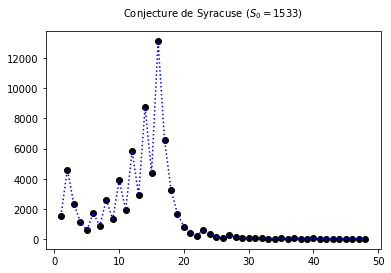

In [3]:
def GraphSyracuse(n):
    y = SyracuseSuite(n)
    x = list(range(1,len(y)+1))
    
    plt.plot(x,y,'ko')
    plt.plot(x,y,'b:')
    plt.title('Conjecture de Syracuse ($S_0 = '+str(n)+'$)', fontsize = 10, pad = 15)
    plt.show()
    
GraphSyracuse(1533)

## Exercise 2

In [4]:
def LisserTab(L,p):
    n = len(L)
    #Création du nouveau tableau contenant des 0 de la bonne taille
    U = [0]*n
    #test du cas particulier où il n'y a rien à faire
    if 2*p+1 >n:
        return L
    else:
        for i in range(n):
            #Comptage du nombre de termes avant le terme t_i
            nb_avant = max(0,i-p)
            #Comptage du nombre de termes apres le terme t_i
            nb_apres = min(n,i+p+1)
            #Calcul des termes du nouveau tableau par sommation
            U[i]= sum( L[k] for k in range(nb_avant,nb_apres))
            #Division par le nombre de termes
            U[i]= U[i]/(nb_apres-nb_avant)
    return U

In [5]:
LisserTab([1,2,3,4,5], 1)

[1.5, 2.0, 3.0, 4.0, 4.5]

In [6]:
def LisserTaber(Tab,p,m):
    TabLisse = Tab
    for i in range(m):
        TabLisse = LisserTab(TabLisse,p)
    return TabLisse

In [7]:
LisserTaber([1, 2, 3, 4], 1, 2)

[1.75, 2.1666666666666665, 2.8333333333333335, 3.25]

In [8]:
def GraphSyracuseLisse(n,p,m):
    y = SyracuseSuite(n)
    x = list(range(1, len(y)+1))
    t = LisserTab(y,p)
    z = LisserTaber(y, p, m)
    plt.figure(figsize=(20,10))
    plt.plot(x, y, ':r', label="Syracuse")
    plt.plot(x, t, '-b', label="Lissage simple")
    plt.plot(x,z,'-g')
    plt.title('Lissage de la suite de Syracuse ($S_0 = '+str(n)+'$)', fontsize=10, pad = 15)
    plt.xlabel('Etape n')
    plt.ylabel('S(n)')
    plt.legend(loc='best')

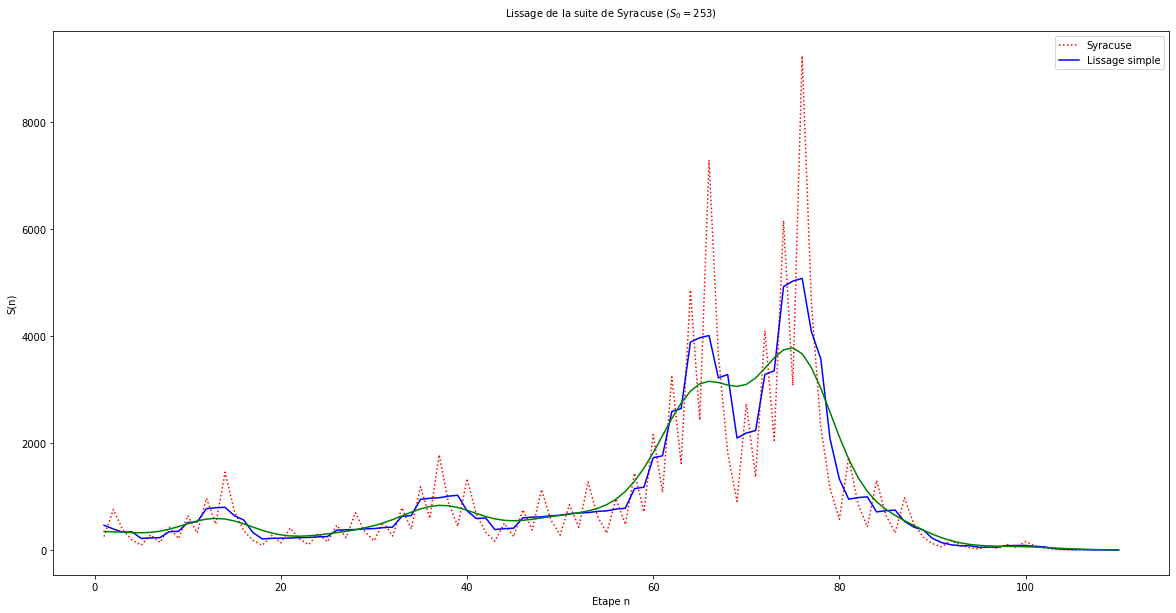

In [9]:
GraphSyracuseLisse(253, 2, 5)